In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("traffic_accidents (1).csv")
df

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,09/13/2023 01:08:00 PM,UNKNOWN,UNKNOWN,UNKNOWN,TURNING,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,13,4,9
209302,07/18/2023 02:10:00 PM,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,14,3,7
209303,10/23/2019 01:32:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT ON GRADE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,INCAPACITATING INJURY,2.0,0.0,2.0,0.0,0.0,0.0,13,4,10
209304,06/01/2020 03:23:00 PM,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,15,2,6


In [ ]:
# Agrupar por clima y severidad 

weather_severity = df.groupby('weather_condition')[['injuries_total', 'injuries_fatal']].sum().reset_index()
weather_severity = weather_severity.sort_values(by="injuries_total", ascending=False)
weather_severity

,weather_condition,injuries_total,injuries_fatal
2,CLEAR,64299.0,323.0
7,RAIN,8931.0,41.0
3,CLOUDY/OVERCAST,2782.0,13.0
10,SNOW,2120.0,3.0
11,UNKNOWN,1085.0,6.0
6,OTHER,303.0,0.0
5,FREEZING RAIN/DRIZZLE,235.0,1.0
4,FOG/SMOKE/HAZE,160.0,1.0
9,SLEET/HAIL,142.0,0.0
1,BLOWING SNOW,40.0,0.0


In [ ]:
light_conditions = df.groupby('lighting_condition')[['injuries_total', 'injuries_fatal']].sum().reset_index()
light_conditions = light_conditions.sort_values(by="injuries_total", ascending=False)
light_conditions

,lighting_condition,injuries_total,injuries_fatal
3,DAYLIGHT,48196.0,154.0
1,"DARKNESS, LIGHTED ROAD",24419.0,187.0
0,DARKNESS,3015.0,29.0
4,DUSK,2352.0,13.0
2,DAWN,1446.0,5.0
5,UNKNOWN,677.0,1.0


In [ ]:
surface_conditions = df.groupby('roadway_surface_cond')[['injuries_total', 'injuries_fatal']].sum().reset_index()
surface_conditions = surface_conditions.sort_values(by='injuries_total', ascending=False)

surface_conditions

,roadway_surface_cond,injuries_total,injuries_fatal
0,DRY,61671.0,316.0
6,WET,13599.0,55.0
5,UNKNOWN,2576.0,9.0
4,SNOW OR SLUSH,1711.0,4.0
1,ICE,337.0,4.0
2,OTHER,197.0,1.0
3,"SAND, MUD, DIRT",14.0,0.0


In [ ]:
road_defects = df.groupby('road_defect')[['injuries_total', 'injuries_fatal']].sum().reset_index()
road_defects = road_defects.sort_values(by='injuries_total', ascending=False)
road_defects


,road_defect,injuries_total,injuries_fatal
1,NO DEFECTS,67672.0,326.0
5,UNKNOWN,11187.0,55.0
6,WORN SURFACE,488.0,5.0
2,OTHER,316.0,2.0
3,"RUT, HOLES",191.0,0.0
4,SHOULDER DEFECT,186.0,1.0
0,DEBRIS ON ROADWAY,65.0,0.0


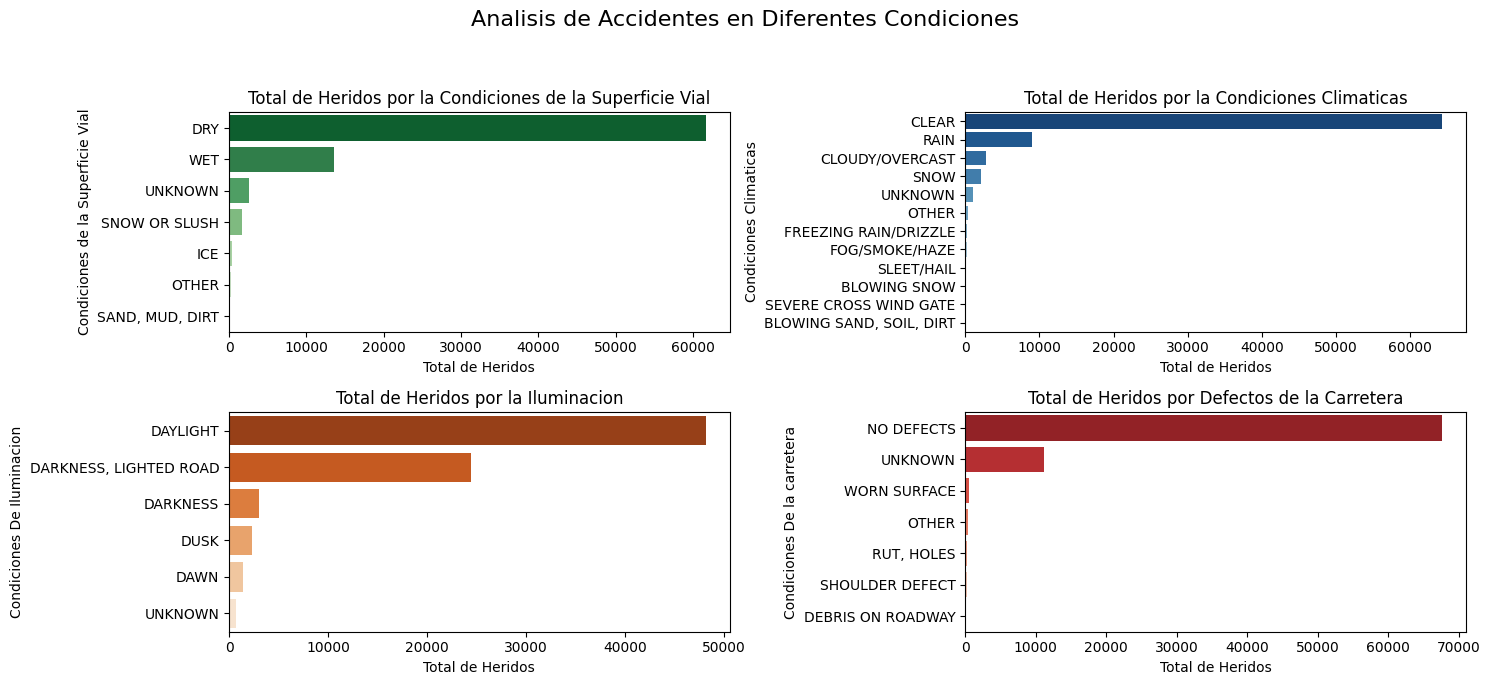

In [ ]:
fig, axes = plt.subplots(2,2, figsize = (15,10))
fig.suptitle("Analisis de Accidentes en Diferentes Condiciones", fontsize = 16)

sns.barplot(data=surface_conditions,
            x='injuries_total',
            y= 'roadway_surface_cond', 
            palette='Greens_r', 
            ax = axes[0,0])
axes[0,0].set_title("Total de Heridos por la Condiciones de la Superficie Vial")
axes[0,0].set_xlabel("Total de Heridos")
axes[0,0].set_ylabel("Condiciones de la Superficie Vial")

sns.barplot(data=weather_severity,
            x='injuries_total',
            y= 'weather_condition', 
            palette='Blues_r',
            ax = axes[0,1])
axes[0,1].set_title("Total de Heridos por la Condiciones Climaticas")
axes[0,1].set_xlabel("Total de Heridos")
axes[0,1].set_ylabel("Condiciones Climaticas")

sns.barplot(data=light_conditions,
            x='injuries_total',
            y= 'lighting_condition', 
            palette='Oranges_r',
            ax = axes[1,0])
axes[1,0].set_title("Total de Heridos por la Iluminacion")
axes[1,0].set_xlabel("Total de Heridos")
axes[1,0].set_ylabel("Condiciones De Iluminacion")

sns.barplot(data=road_defects,
            x='injuries_total',
            y= 'road_defect', 
            palette='Reds_r',
            ax = axes[1,1])
axes[1,1].set_title("Total de Heridos por Defectos de la Carretera")
axes[1,1].set_xlabel("Total de Heridos")
axes[1,1].set_ylabel("Condiciones De la carretera")


plt.tight_layout(rect=[0, 0.3, 1, 0.95])
plt.show()

# **Risk Factors**

### As we can see, most accidents occur under normal conditions, which might seem counterintuitive. However, from my point of view, accidents happen more often in normal conditions because there is generally more vehicle traffic on the streets during those times — in other words, more cars on the road. This higher volume naturally leads to a significant increase in the number of accidents under normal conditions.
### That said, a notable risk factor is rain or wet road surfaces. During these conditions, tires lose traction, making it harder to brake. In other cases, if the tires are not in good condition, the vehicle can skid more easily, especially at high speeds.Additionally, rain often reduces driver visibility, similar to situations on dimly lit or dark roads, where objects, animals, curves, and other hazards can be overlooked — potentially causing major accidents.

In [10]:
causes = df.groupby('prim_contributory_cause')[['injuries_total', 'injuries_fatal']].sum().reset_index()
causes = causes.sort_values(by='injuries_total', ascending=False)

causes.head(10)

,prim_contributory_cause,injuries_total,injuries_fatal
18,FAILING TO YIELD RIGHT-OF-WAY,21094.0,67.0
36,UNABLE TO DETERMINE,18390.0,97.0
6,DISREGARDING TRAFFIC SIGNALS,10924.0,80.0
17,FAILING TO REDUCE SPEED TO AVOID CRASH,5191.0,32.0
19,FOLLOWING TOO CLOSELY,3759.0,1.0
5,DISREGARDING STOP SIGN,3725.0,12.0
24,IMPROPER TURNING/NO SIGNAL,3380.0,7.0
26,NOT APPLICABLE,1683.0,10.0
12,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,1407.0,2.0
23,IMPROPER OVERTAKING/PASSING,1283.0,8.0


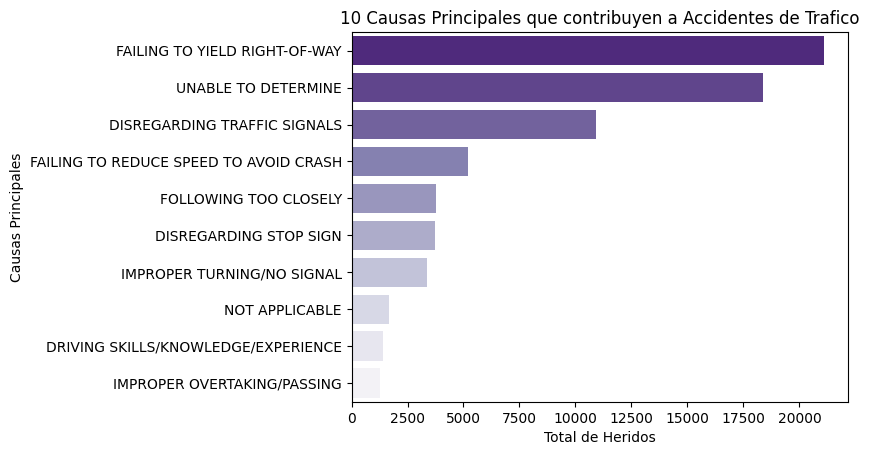

In [11]:
top_causes = causes.head(10)

sns.barplot(data=top_causes,
            x='injuries_total',
            y='prim_contributory_cause',
            palette = 'Purples_r')

plt.title("10 Causas Principales que contribuyen a Accidentes de Trafico")
plt.xlabel("Total de Heridos")
plt.ylabel("Causas Principales")
plt.show()

# **Analysis of Accident Causes**
### The data reveals that the leading cause of injuries is drivers failing to yield to pedestrians. This often occurs when drivers are under the influence of alcohol or experiencing extreme fatigue, both of which impair their ability to operate a vehicle safely, resulting in harm to innocent pedestrians.
### In the case of fatal injuries, the predominant category falls under “undetermined causes.” This is likely associated with high-speed roadway accidents, where multiple factors may contribute. Such incidents are not always attributable to driver negligence; they can also stem from mechanical failures. At high speeds, vehicle components may suffer excessive wear or sudden malfunctions, leading to loss of control and severe accidents, particularly on roads known for their high risk.